In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [31]:
# Upload cleaned dataset

all_deaths_ok = pd.read_csv("../data/output/all-deaths_by-county-sex-race_oklahoma_2010-2023.csv")
# Visualuze
all_deaths_ok.groupby(['year','county','sex','race']).sum().head(20)

deaths
year county  sex    race                                             
2010 Adair   Female American Indian or Alaska Native              0.0
                    Asian                                         0.0
                    Black or African American                     0.0
                    More than one race                            0.0
                    Native Hawaiian or Other Pacific Islander     0.0
                    Other                                         0.0
                    Unknown                                       0.0
                    White                                         0.0
             Male   American Indian or Alaska Native             12.0
                    Asian                                         0.0
                    Black or African American                     0.0
                    More than one race                            0.0
                    Native Hawaiian or Other Pacific Islander     0.0
                    Other                                         0.0
                    Unknown                                       0.0
                    White                                         7.0
     Alfalfa Female American Indian or Alaska Native              0.0
                    Asian                                         0.0
                    Black or African American                     0.0
                    More than one race                            0.0

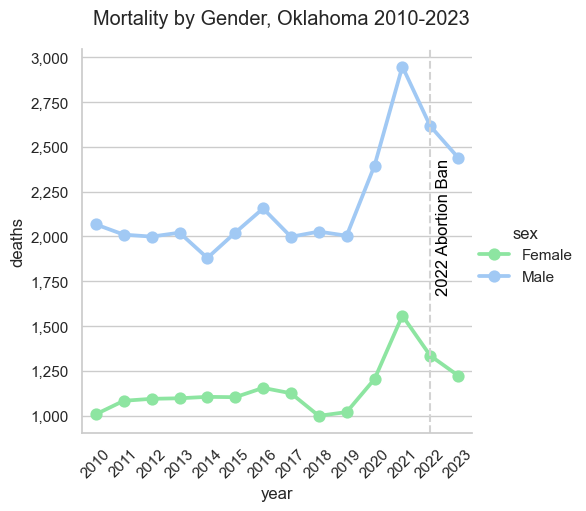

In [65]:
# Visualize general trend between all males and all females

sns.set_theme(style="whitegrid", palette="pastel")

g = sns.catplot(
    data=all_deaths_ok[['year','sex','deaths']].groupby(['year','sex']).sum().reset_index(),
    x="year",
    y="deaths",
    hue="sex",
    palette={"Male": "b", "Female": "g"},
    markers="o",
    linestyles="-",
    kind="point",
)

# Set plot title 
g.fig.suptitle("Mortality by Gender, Oklahoma 2010-2023")
g.fig.subplots_adjust(top=0.9) # Adjust so title doesn't overlap

# Rotate x-ticks
plt.xticks(rotation=45)

# Add line for 2022 abortion ban
plt.axvline(x=12, linestyle='--', color='lightgrey') 
# Add a label next to the vertical line
ymax = g.ax.get_ylim()[1]  # Top of y-axis
g.ax.text(12 + 0.2, ymax*0.8, "2022 Abortion Ban", rotation=90, color='black', va='top', ha='left')

# Format y-axis with commas
g.ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()


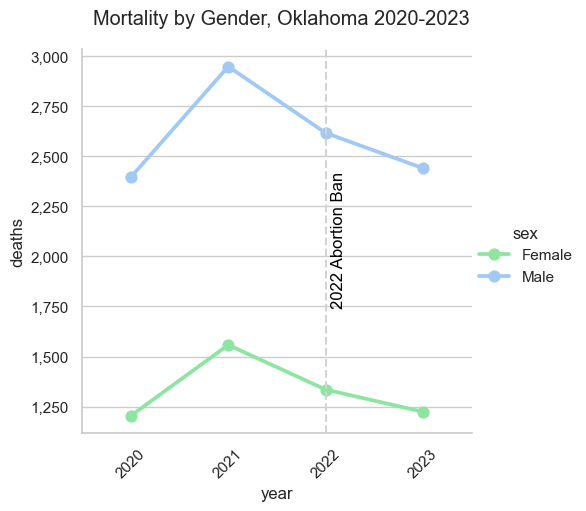

In [62]:
# Closer look at recent years

sns.set_theme(style="whitegrid", palette="pastel")

g = sns.catplot(
    data=all_deaths_ok[all_deaths_ok["year"].isin([2020,2021,2022,2023])][['year','sex','deaths']].groupby(['year','sex']).sum().reset_index(),
    x="year",
    y="deaths",
    hue="sex",
    palette={"Male": "b", "Female": "g"},
    markers="o",
    linestyles="-",
    kind="point",
)

# Set plot title 
g.fig.suptitle("Mortality by Gender, Oklahoma 2020-2023")
g.fig.subplots_adjust(top=0.9) # Adjust so title doesn't overlap

# Rotate x-ticks
plt.xticks(rotation=45)

# Add line for 2022 abortion ban
plt.axvline(x=2, linestyle='--', color='lightgrey') 
# Add a label next to the vertical line
ymax = g.ax.get_ylim()[1]  # Top of y-axis
g.ax.text(2 + 0.05, ymax*0.8, "2022 Abortion Ban", rotation=90, color='black', va='top', ha='left')


# Format y-axis with commas
g.ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()
